In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from WFC import WaveFunctionCollapse, WaveFunctionCollapseVisualizer
import rasterio
import seaborn as sns

from utils import visualize_3d_terrain, visualize_terrain
from functions import height_to_slopes, slopes_to_height

(200, 200)
data/N26E057.hgt


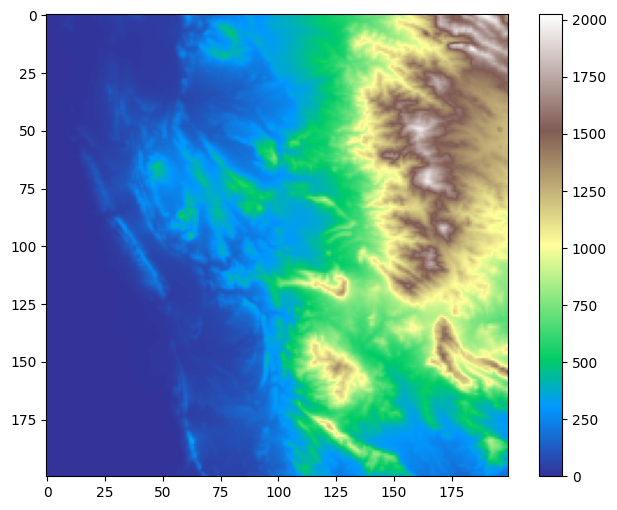

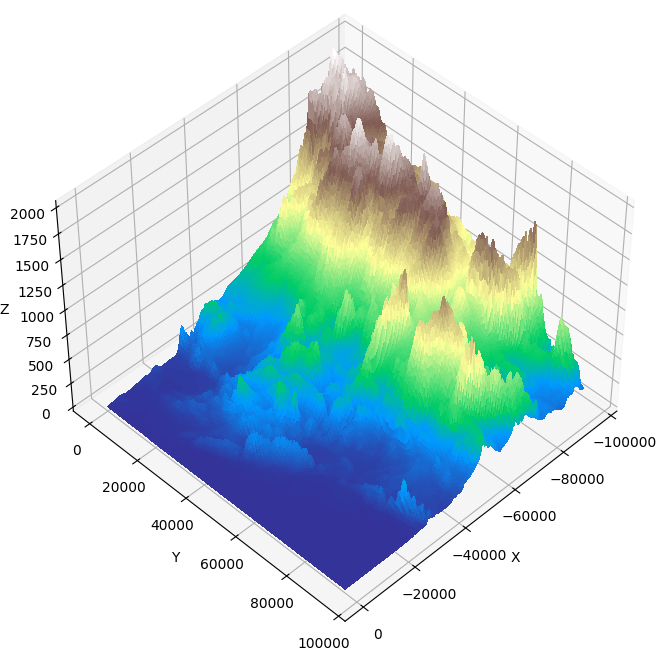

(np.float64(0.0), np.float64(2024.0), np.float64(482.38825))

In [2]:
# dataset_dir = "/Users/parsa/Daneshgah/Arshad/Thesis/datasets/pappas_kaggle/archive"
# data_paths = sorted(glob.glob(os.path.join(dataset_dir, "*.png")))
# sample_data_path = data_paths[0]

# # Load the image
# sample_data = iio.imread(sample_data_path, mode='I')[400:500, 400:500]  # 'I' mode ensures reading as uint16
# print(sample_data.dtype)  # This should print 'uint16'

# # Load the image
# sample_data = cv2.imread(sample_data_path, cv2.IMREAD_UNCHANGED)
# print(sample_data.dtype)  # This should print 'uint16'

# i = 15
# dataset_dir = "/Users/parsa/Daneshgah/Arshad/Thesis/datasets/SRTM_IRAN/data/"
# data_paths = sorted(glob.glob(os.path.join(dataset_dir, "*.hgt")))
# sample_data_path = data_paths[i]

# from shutil import copy2
# copy2(sample_data_path, "./data")
sample_data_path = "data/N26E057.hgt"

# with rasterio.open(sample_data_path) as src:
#     sample_data = src.read(1)[2500:3000, 1500:2000].astype(float)  # Read the first (and only) band
#     profile = src.profile  # Get metadata such as CRS, transform, etc.

scale_factor = 1.0 / 16


with rasterio.open(sample_data_path) as src:
    # Define the desired smaller shape (for example, half the original size)
    new_height = int(src.height * scale_factor)
    new_width = int(src.width * scale_factor)

    # Read and resample the data to the new shape
    sample_data = src.read(
        1,  # First band
        out_shape=(new_height, new_width),
        resampling=rasterio.enums.Resampling.bilinear  # Choose the resampling method
    ).astype(float)[:200, :200]
    


# sample_data = np.array([
#     [0, 1, 3, 10, 15, 9],
#     [2, 4, 3, 8, 13, 10],
#     [3, 1, 7, 7, 12, 9],
#     [4, 2, 6, 10, 13, 11],
#     [6, 1, 8, 9, 15, 7],
#     [6, 3, 2, 5, 4, 2,]]
# )

print(sample_data.shape)


print(sample_data_path)
visualize_terrain(sample_data)
visualize_3d_terrain(sample_data, sampling_scale_factor=scale_factor)
# sns.heatmap(sample_data, annot=True, cmap='terrain')
sample_data.min(), sample_data.max(), sample_data.mean()

In [3]:

# wfc = WaveFunctionCollapse(sample_data, pattern_size=2, grid_size=(20,20), wrap_input=False)
# output_image = wfc.run()

sample_data.shape

(200, 200)

In [4]:
grad_x, grad_y = height_to_slopes(sample_data)
grad_x.shape, grad_y.shape

((200, 199), (199, 200))

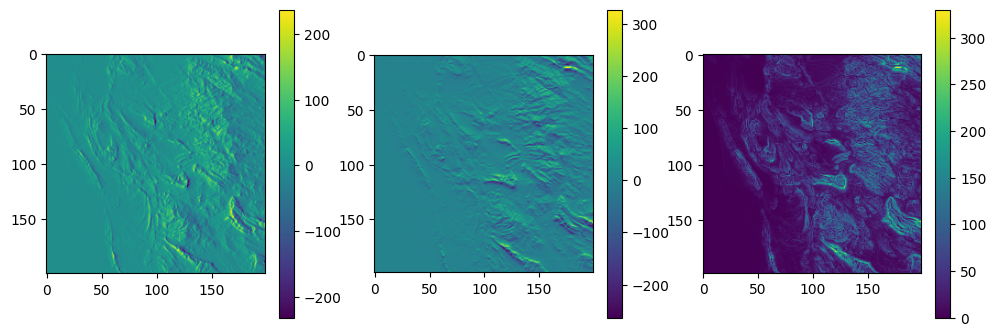

In [5]:
fix, axes = plt.subplots(1, 3, figsize=(12,4))
im1 = axes[0].imshow(grad_x)#, cmap='terrain')
im2 = axes[1].imshow(grad_y)#, cmap='terrain')
im3 = axes[2].imshow(np.sqrt(grad_x[:-1,...]**2 + grad_y[...,:-1]**2).astype(int))
fix.colorbar(im1, ax=axes[0])
fix.colorbar(im2, ax=axes[1])
fix.colorbar(im3, ax=axes[2])

# im1 = sns.heatmap(grad_x, ax=axes[0], annot=True)
# im2 = sns.heatmap(grad_y, ax=axes[1], annot=True)
# im3 = sns.heatmap(sample_data, ax=axes[2], annot=True)



In [6]:


hh = slopes_to_height(grad_x, grad_y)
print(np.unique(hh-sample_data))
print(len(np.unique(hh-sample_data)) == 1)
# fix, axes = plt.subplots(1, 2, figsize=(8,4))
# im1 = sns.heatmap(hh, ax=axes[0], annot=True)
# im2 = sns.heatmap(sample_data2, ax=axes[1], annot=True)

# visualize_terrain(hh)
# visualize_3d_terrain(hh)

[-6.]
True


In [7]:
slopes = np.concatenate([grad_x[:-1, ..., np.newaxis], grad_y[..., :-1, np.newaxis]], axis=2)
slopes.shape

(199, 199, 2)

In [9]:
wfc_terrain = WaveFunctionCollapse(slopes, (2,2,2), (20,20,2), remove_low_freq=True, low_freq=1)


Matching Patterns: 100%|██████████| 3741/3741 [02:14<00:00, 27.78it/s]


In [10]:
paa = list(wfc_terrain.patterns)
len(paa)

3741

In [11]:
vis = WaveFunctionCollapseVisualizer((100,1000), [], wfc_terrain.pattern_to_number, (2,2,2), wfc_terrain.adjacency_rules)

d:\Kar\GameDev\PCG\WaveFunctionCollapse\WFC.py:435: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


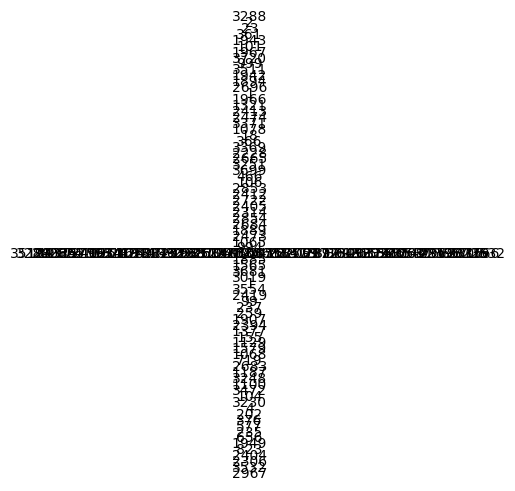

In [12]:
vis.visualize_adjacency(paa[0])

In [13]:
len(wfc_terrain.observations)

0

In [14]:
output_image = wfc_terrain.run()


Observation number 9: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 12: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 25: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 33: 100%|██████████| 20/20 [00:00<00:00, 1903.82it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 13: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 16: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 15: 100%|██████████| 20/20 [00:00<00:00, 4839.67it/s]


No Solution Found, Retrying...


Observation number 40: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 22: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 11: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 19: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 34: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 46: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<00:00, 19953.87it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 10: 100%|██████████| 20/20 [00:00<00:00, 19859.39it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<00:00, 41630.81it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<00:00, 12919.46it/s]


No Solution Found, Retrying...


Observation number 8: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 31: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<00:00, 20010.99it/s]


No Solution Found, Retrying...


Observation number 9: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 20: 100%|██████████| 20/20 [00:00<00:00, 102051.19it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 12: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 13: 100%|██████████| 20/20 [00:00<00:00, 19864.10it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 31: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<00:00, 19991.92it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 8: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 12: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 22: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<00:00, 23730.15it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<00:00, 240361.26it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 33: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<00:00, 75032.27it/s]


No Solution Found, Retrying...


Observation number 9: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 38: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<00:00, 19915.97it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 9: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<00:00, 10852.02it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<00:00, 19977.63it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<00:00, 19987.15it/s]


No Solution Found, Retrying...


Observation number 8: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 27: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 14: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 29: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 23: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 8: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<00:00, 14540.84it/s]


No Solution Found, Retrying...


Observation number 51: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<00:00, 19840.61it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<00:00, 19868.80it/s]


No Solution Found, Retrying...


Observation number 10: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 8: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 13: 100%|██████████| 20/20 [00:00<00:00, 19803.14it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 8: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<00:00, 20001.45it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 17: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<00:00, 20010.99it/s]


No Solution Found, Retrying...


Observation number 8: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 33: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<00:00, 19873.51it/s]


No Solution Found, Retrying...


Observation number 13: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 9: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 8: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 17: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 12: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<00:00, 20316.32it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<00:00, 20020.54it/s]


No Solution Found, Retrying...


Observation number 12: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 29: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<00:00, 33743.40it/s]


No Solution Found, Retrying...


Observation number 2: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 8: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 38: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 4: 100%|██████████| 20/20 [00:00<00:00, 20010.99it/s]


No Solution Found, Retrying...


Observation number 9: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<00:00, 19996.68it/s]


No Solution Found, Retrying...


Observation number 9: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 3: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 10: 100%|██████████| 20/20 [00:00<00:00, 14490.60it/s]


No Solution Found, Retrying...


Observation number 13: 100%|██████████| 20/20 [00:00<00:00, 18974.46it/s]


No Solution Found, Retrying...


Observation number 7: 100%|██████████| 20/20 [00:00<00:00, 19807.81it/s]


No Solution Found, Retrying...


Observation number 6: 100%|██████████| 20/20 [00:00<00:00, 20025.32it/s]


No Solution Found, Retrying...


Observation number 5: 100%|██████████| 20/20 [00:00<00:00, 19850.00it/s]


No Solution Found, Retrying...


Observation number 26: 100%|██████████| 20/20 [00:00<?, ?it/s]


No Solution Found, Retrying...


Observation number 401: 100%|██████████| 20/20 [00:00<?, ?it/s]


In [15]:
output_image.shape

(20, 20, 2)

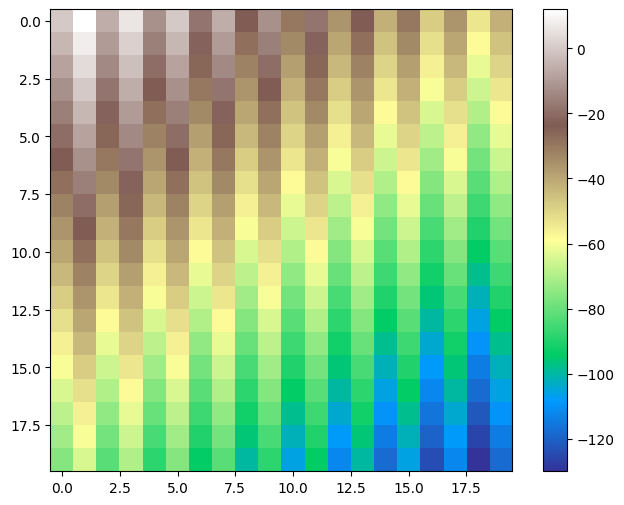

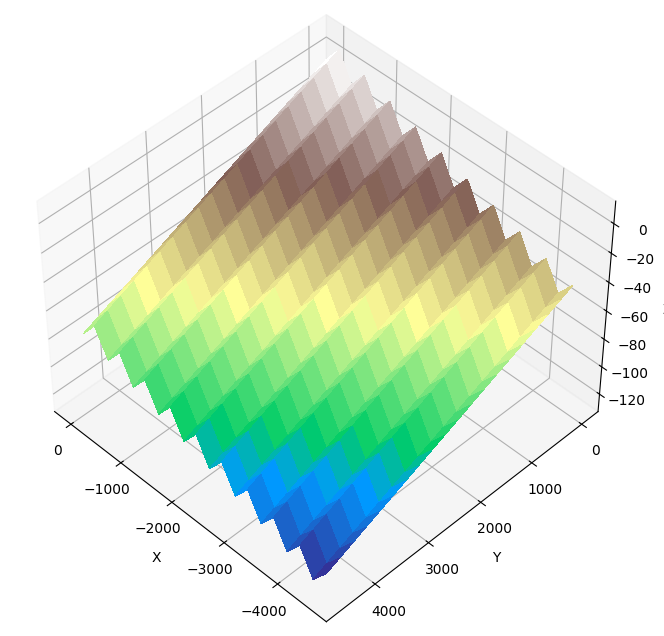

In [20]:
h_out = slopes_to_height(output_image[..., 0], output_image[..., 1])
visualize_terrain(h_out)
visualize_3d_terrain(h_out, azim=135)

In [21]:
b = output_image[:2,:2,...]
b.shape

(2, 2, 2)

In [24]:
b.transpose([1,0,2])[...,0]

array([[ 12.,  12.],
       [-18., -18.]])